In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../../common_code')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

from formation_channels import * 


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


obtain index of the SFRD models that we want to highlight


In [2]:

def draw_arrows(axes=None):

    
    textbox_props = dict(boxstyle='round', facecolor='lightgray', alpha=0.3)
    

    ar_c = 'k' #'turquoise'
    ar_lw=4
    
    # BHBH
    axe =axes[0]
    # properties  arrow 
    strr = r"\textbf{Only Stable}" + '\n' + r'\textbf{Mass Transfer}' + '\n'   + r"\textbf{channel (II)}" + '\n'   + r"\textbf{contribution} "
    x_xy, y_xy = 19.1, 0.7
    x_xytext, y_xytext = 21.8, 0.3
    conn = "angle3,angleA=90,angleB=0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=15, va="center", ha="right", bbox=textbox_props,
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", ec=ar_c , lw=ar_lw), zorder=20000)    
    
    
    

    # BHNS 
    axe =axes[1]
    # properties  arrow 
    strr = r"\textbf{Classic CE}" + '\n' + r'\textbf{channel (I)}' + '\n' +r"\textbf{contribution} "
    x_xy, y_xy = 19.1, 0.14
    x_xytext, y_xytext = 20.9, 0.54
    conn = "angle,angleA=-90,angleB=180,rad=0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=15, va="center", ha="right", bbox=textbox_props,
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", ec=ar_c , lw=ar_lw), zorder=20000)
    
    
    
    # NSNS 
    axe =axes[2]
    # properties  arrow 
    strr = r"\textbf{Double-core CE}" + '\n' + r'\textbf{channel (IV)}' + '\n' +r"\textbf{contribution} "
    x_xy, y_xy = 19.1, 0.7
    x_xytext, y_xytext = 20.9, 0.3
    conn = "angle3,angleA=90,angleB=0"

    # draw arrow
    axe.annotate(strr,
      xy=(x_xy, y_xy), xycoords='data',
      xytext=(x_xytext, y_xytext), textcoords='data',
      size=15, va="center", ha="right", bbox=textbox_props,
      arrowprops=dict(arrowstyle="-|>",
                      connectionstyle=conn,
                      fc="k", ec=ar_c , lw=ar_lw), zorder=20000)
    
    return 



def plotFormationChannelRates_vbars(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,14), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
#     MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'orange',  'immediate CE': '#EF476F'  , r'double-core CE':'#073B4C', 'other':'gray', 'vi':'cyan', 'vii':'#FFD166'}
    List_formationchannelOptions = ['All',  'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'vi', 'vii', 'other']
    ind_formationchannelOptions = [7,  1, 2, 3, 4, 5, 6, 0]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    ind_number_values = int(len(ind_formationchannelOptions)*2)
    
    dx = 0.4 #0.3
    dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) #+ ind_m
    dxlen = (2*dx)/len(MSSFRnameslist)
    

    for ind_t, DCOtype in enumerate(Types):
        print()
        axe = axes[ind_t]
        DCOname = DCOname_dict[DCOtype]
        
        stringgg =  'formation_channels'
        csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     

        df_name = csvPath
        df = pd.read_csv(df_name, index_col=0).T

        for ind_L, MSSFRname in enumerate(MSSFRnameslist):
            ratesRatio_low = np.zeros(nModels)
            ratesRatio     = np.zeros(nModels)
            
            x_positions_ = range(nModels)
            xx_ = dxrange[ind_L]
            x_positions = np.asarray(x_positions_) + xx_

                
            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]
            
#             if MSSFRname=='231':
#                 zorder=10
#                 label=MSSFRnameslist[ind_L] 
#                 ls = MSSFRlinestyles[1]
#                 ALPHA=1
#             elif MSSFRname=='312':
#                 zorder=10
#                 label=MSSFRnameslist[ind_L]
#                 ls = MSSFRlinestyles[2]
#                 ALPHA=1
#             else:
#                 zorder=2
#                 label=None    
#                 ls = MSSFRlinestyles[0]
#                 ALPHA=0.1
                
            for ind_c, whichChannel in enumerate(['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other', 'vi']):

                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichChannel]*2
                    rates = rates_L[ind_wanted::16][0:nModels]
                    totalrates = rates_L[14::16][0:nModels]

                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 
                    ylabel = r'\textbf{fraction} $\,\mathcal{R}_{\rm{m}}^{{0}}$'


                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                    rates = rates_L[ind_wanted::16][0:nModels]
                    totalrates = rates_L[15::16][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0])   
                    ylabel = r'\textbf{fraction} $\, \mathcal{R}_{\rm{det}}$'

                
                ratesRatio += np.asarray(rates)/np.asarray(totalrates)
                
                axe.bar(x_positions, height=(ratesRatio-ratesRatio_low),  bottom=ratesRatio_low, color=channelColorDict[whichChannel], alpha=1, \
                       width=dxlen, zorder=100)
                
                ratesRatio_low += np.asarray(rates)/np.asarray(totalrates)
                

        
        # draw custom grid lines in plot 
        xmin, xmax = -0.8, nModels +1. # change nModels + 1 to len(df.T)
        xx = np.linspace(xmin,xmax,15) # just mock x-axes to draw lines
        for ll in [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=0.9, zorder=0)
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )


#       # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model}'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)


        # set physical labels on bottom
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichChannel]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.99, 0.94, r'\textbf{%s}'%TypesLabels[ind_t] , rotation = 0, fontsize = fs+3, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')
        axe.text(0.99, 0.85, r'\textbf{detections}' , rotation = 0, fontsize = 17, color = 'k', va='top', ha = 'right',transform=axe.transAxes, zorder=1E3)#, weight = 'bold')



        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)
            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-6, rotation=30)#, orientation=30)    
     

    
    ## make legend 
    x__ = -100*np.ones(5)
    for _, channel in enumerate([ 'classic',  'stable B no CEE', 'vii','immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[channel])    
    lgd = f.legend(fontsize=fs-1, ncol=2,bbox_to_anchor=(.85, 1.115)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
#     draw_arrows(axes=axes)


    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.11)#2)
    plt.savefig('./FormationChannels_' + whichRate  + '_vbars.pdf', transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')#, loc='upper center')
    plt.savefig('./FormationChannels_' + whichRate  + '_vbars.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight')#, loc='upper center')
    plt.show()
    plt.close()
    
    print()
    
    return






# nModels=20



the observed fiducial rate for  BBH = 58.53267139023945
the observed fiducial rate for  BBH = 198.65282614030068
the observed fiducial rate for  BBH = 12.527778261545045
the observed fiducial rate for  BBH = 6.108615384306575
the observed fiducial rate for  BBH = 0.3327693693720939
the observed fiducial rate for  BBH = 2.7218303365580923
the observed fiducial rate for  BBH = 0.0

the observed fiducial rate for  BHNS = 9.262391707408261
the observed fiducial rate for  BHNS = 0.4588423143858912
the observed fiducial rate for  BHNS = 0.0339305330352179
the observed fiducial rate for  BHNS = 0.4652898905617596
the observed fiducial rate for  BHNS = 0.03526468822924
the observed fiducial rate for  BHNS = 0.5718763923347457
the observed fiducial rate for  BHNS = 0.0

the observed fiducial rate for  BNS = 0.2186737882909167
the observed fiducial rate for  BNS = 0.0
the observed fiducial rate for  BNS = 0.0
the observed fiducial rate for  BNS = 8.3009978419845e-05
the observed fiducial rate f

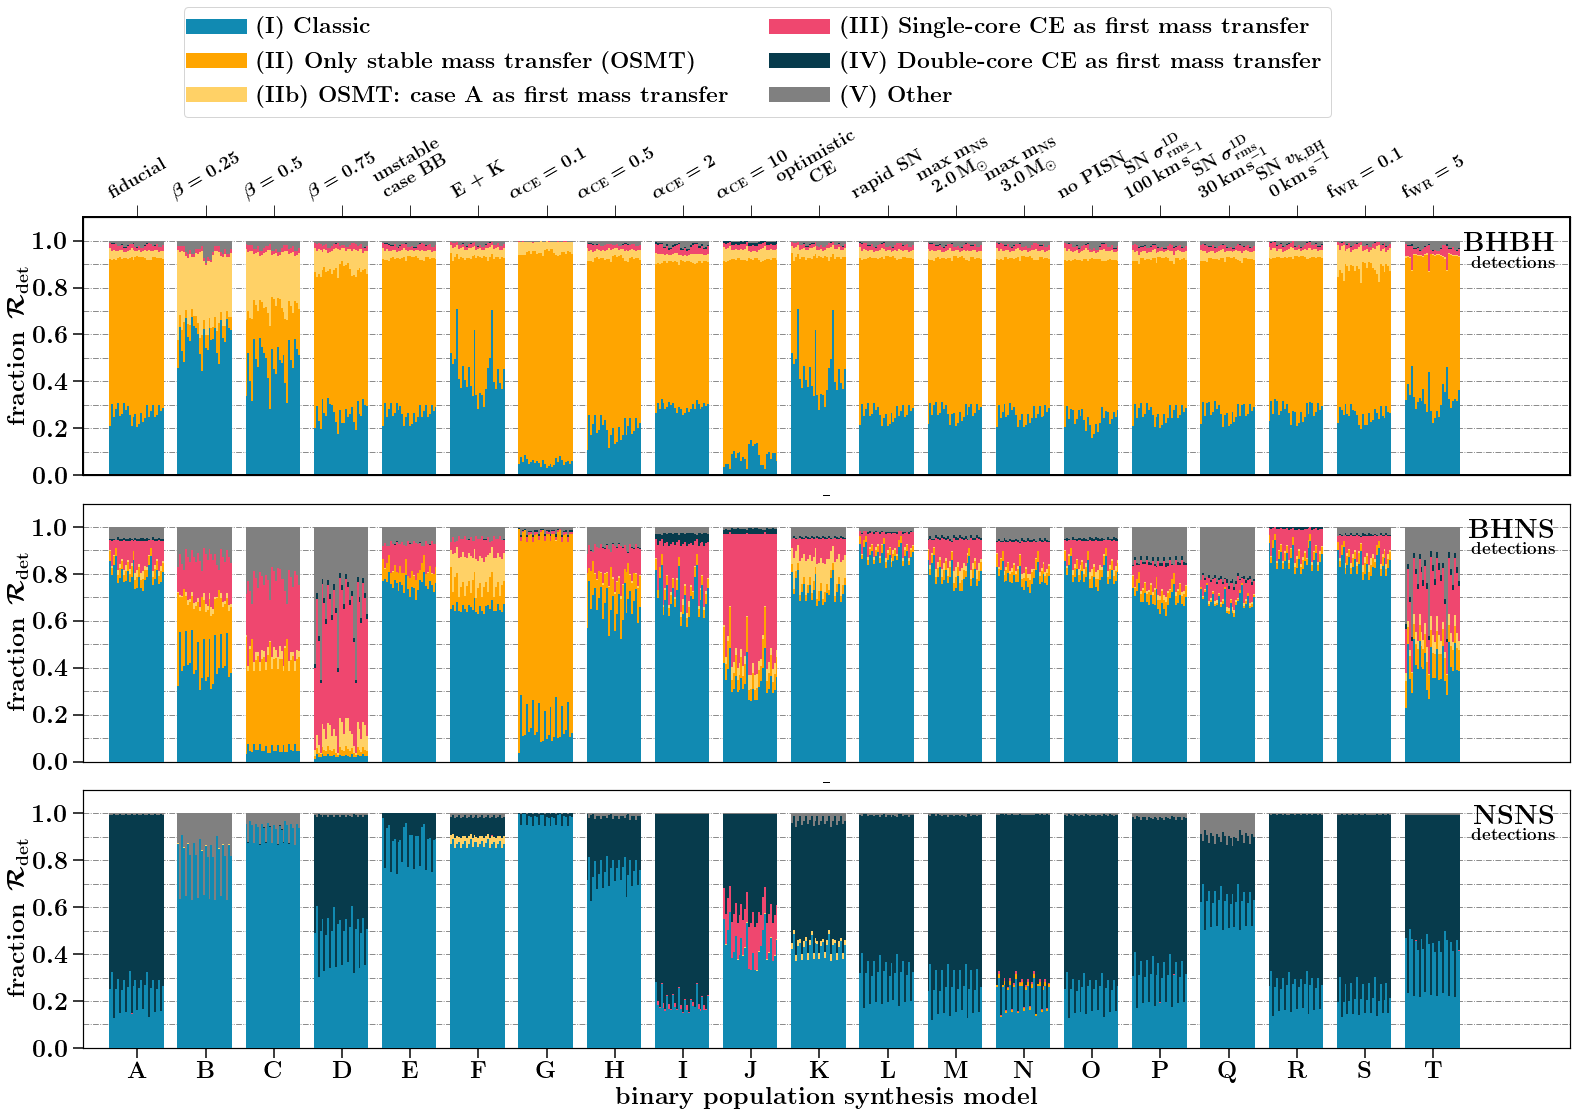

In [3]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,1.1],[0,1.1],[0,1.1]]
plotFormationChannelRates_vbars(whichRate='observed', CSVdir=CSVdir)





the intrinsic fiducial rate for  BBH = 10.264851714686774
the intrinsic fiducial rate for  BBH = 18.90719716772108
the intrinsic fiducial rate for  BBH = 0.7486914997964182
the intrinsic fiducial rate for  BBH = 2.2341711150681087
the intrinsic fiducial rate for  BBH = 0.3442761401186718
the intrinsic fiducial rate for  BBH = 1.0213175791444875
the intrinsic fiducial rate for  BBH = 0.0

the intrinsic fiducial rate for  BHNS = 35.47937182808738
the intrinsic fiducial rate for  BHNS = 3.191658255170108
the intrinsic fiducial rate for  BHNS = 0.1223046711597047
the intrinsic fiducial rate for  BHNS = 2.3264495281697952
the intrinsic fiducial rate for  BHNS = 0.2214191905750853
the intrinsic fiducial rate for  BHNS = 1.6815730398792943
the intrinsic fiducial rate for  BHNS = 0.0

the intrinsic fiducial rate for  BNS = 8.226833432993995
the intrinsic fiducial rate for  BNS = 0.0
the intrinsic fiducial rate for  BNS = 0.0
the intrinsic fiducial rate for  BNS = 0.0034781483717232
the intrin

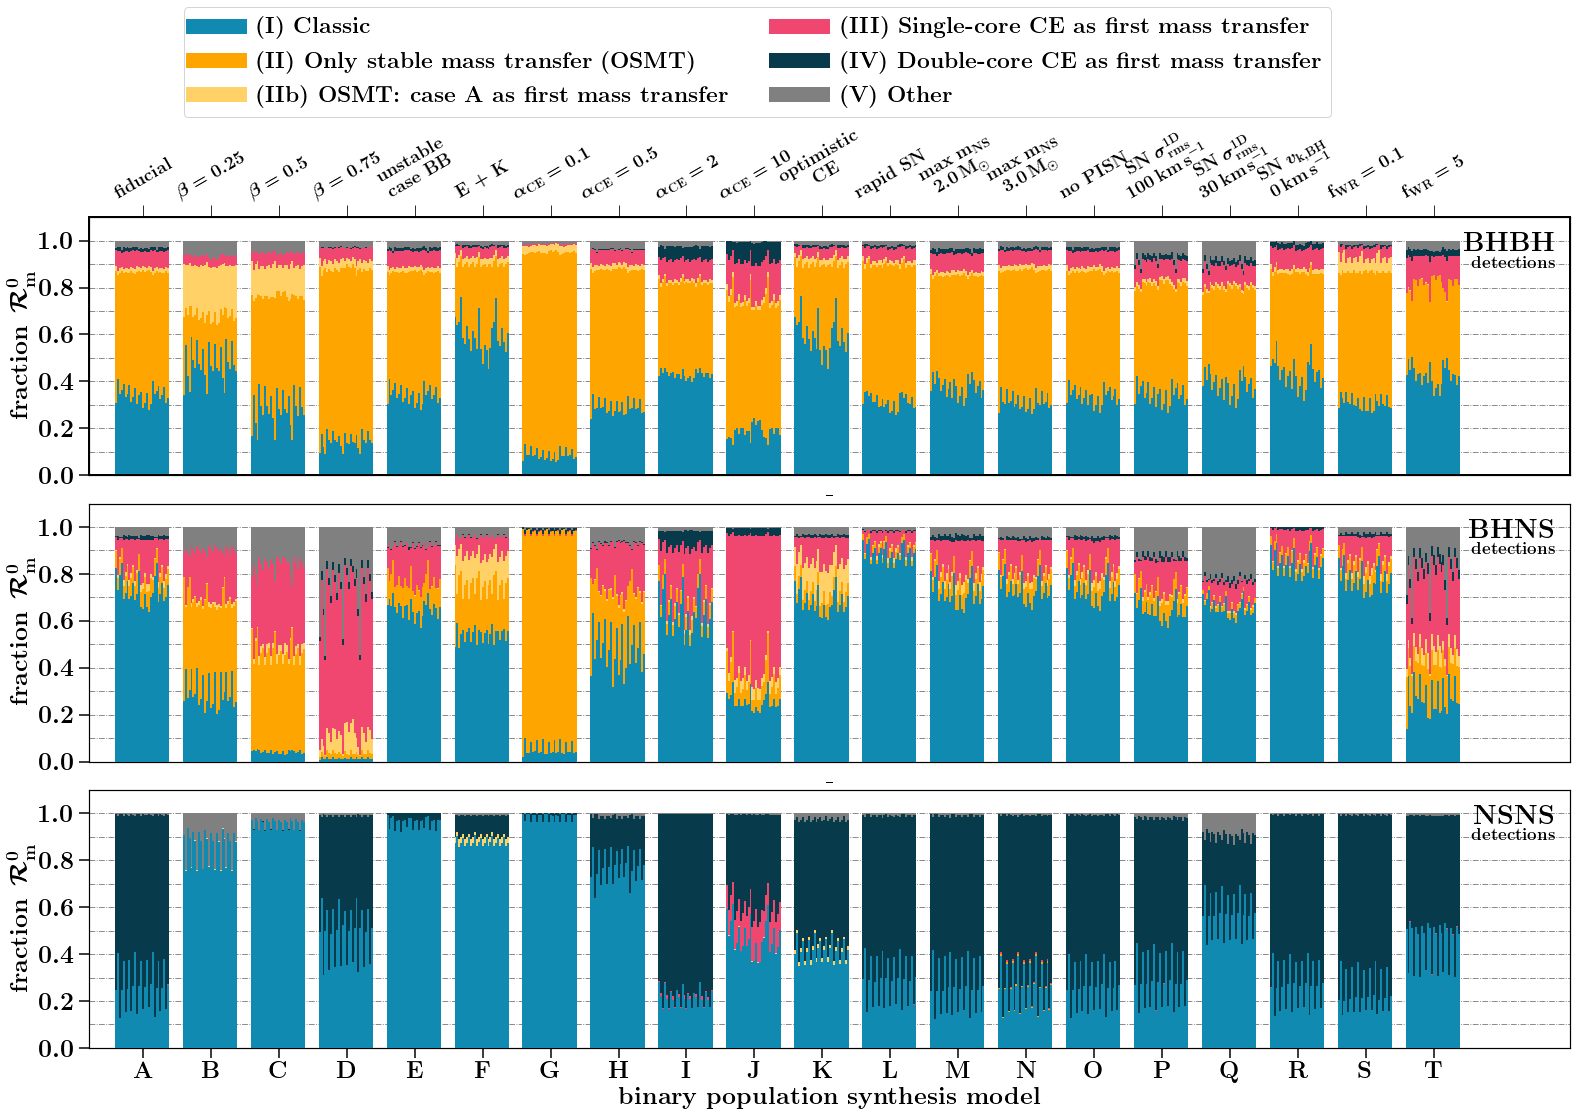

In [4]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,1.1],[0,1.1],[0,1.1]]
plotFormationChannelRates_vbars(whichRate='intrinsic', CSVdir=CSVdir)





In [5]:
def plotFormationChannelRates(whichRate='intrinsic', CSVdir='name'):
    
    """
    parameters
    
    """
    
    ncols=1
    nrows=3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,14), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})
    
    Types      = ['BBH', 'BHNS', 'BNS']
    TypesLabels      = ['BHBH', 'BHNS', 'NSNS']

    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
#     # channel colors 
#     channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
#     channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
#     List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
#     ind_formationchannelOptions = [0,1,2,3,4,5]
#     dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'orange',  'immediate CE': '#EF476F'  , r'double-core CE':'#073B4C', 'other':'gray', 'vi':'cyan', 'vii':'#FFD166'}
    List_formationchannelOptions = ['All',  'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'vi', 'vii', 'other']
    ind_formationchannelOptions = [7,  1, 2, 3, 4, 5, 6, 0]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    ind_number_values = int(len(ind_formationchannelOptions)*2)
    

    for ind_t, DCOtype in enumerate(Types):
        axe = axes[ind_t]
        DCOname = DCOname_dict[DCOtype]

        for ind_c, whichChannel in enumerate(['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other', 'vi']):


            for ind_L, MSSFRname in enumerate(MSSFRnameslist):

        
                stringgg =  'formation_channels'
                csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     

                df_name = csvPath
                df = pd.read_csv(df_name, index_col=0).T

                key_mssfr = MSSFRheaderDict[MSSFRname]
                rates_L = df[key_mssfr]



                
                if whichRate =='intrinsic':
                    ind_wanted = dictFormationChannelIndex[whichChannel]*2
                    rates = rates_L[ind_wanted::16][0:nModels]
                    totalrates = rates_L[14::16][0:nModels]

                    if ind_L==0:
                        print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 

                    ylabel = r'\textbf{fraction} $\,\mathcal{R}_{\rm{m}}^{{0}}$'    



                elif whichRate=='observed':
                    ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
                    rates = rates_L[ind_wanted::16][0:nModels]
                    totalrates = rates_L[15::16][0:nModels]
                    if ind_L==0:
                        print('the observed fiducial rate for ', DCOtype ,'=',rates[0])   
                    ylabel = r'\textbf{fraction} $\, \mathcal{R}_{\rm{det}}$'



                if MSSFRname=='231':
                    zorder=10
                    label=MSSFRnameslist[ind_L] 
                    ls = MSSFRlinestyles[1]
                    ALPHA=1
                elif MSSFRname=='312':
                    zorder=10
                    label=MSSFRnameslist[ind_L]
                    ls = MSSFRlinestyles[2]
#                     print('label=', label)
                    ALPHA=1
                else:
                    zorder=2
                    label=None    
                    ls = MSSFRlinestyles[0]
                    ALPHA=0.1


                ratesRatio = np.asarray(rates)/np.asarray(totalrates)
                ind_color = dictFormationChannelIndex[whichChannel]
                axe.plot(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], lw=2, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
                axe.scatter(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], s=50, label=None, zorder=zorder+1, alpha=1, linestyle=ls) #c=BPScolors




        xmin = -0.8
        xmax = nModels +0.5 # change to len(df.T)
        xx = np.linspace(xmin,xmax,15)


        for ll in [0.25, 0.5, 0.75]:
            axe.plot(xx, ll*np.ones_like(xx), c='gray', linestyle='dashdot', lw=1.5, zorder=0)
            axe.text(17.5-0.04, ll, str(ll) +r'$\,$' , rotation = 0, fontsize = fs-4, color = 'gray', va='bottom', ha = 'right')#, weight = 'bold')
        axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )



#       # make up axes
        if ind_t ==2:
            xlabel = r'\textbf{binary population synthesis model} $\mu$'
        else:
            xlabel=r'  $\_$ '

        axe.set_xlim(xmin, xmax)
        axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#             axe.set_yscale('log')

        print(BPSnameslist)
        print(nModels)
        # set physical labels on bottom
        if ind_t==2:
            physicalnames = []
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(r'\textbf{%s}'%(bps_model) )
            axe.set_xticks(range(nModels))
            axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

            axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
            ind_label = dictFormationChannelIndex[whichChannel]-1
        else:
            axe.set_xticks([])
            axe.set_xticklabels( () )
            
        # add name of DCO type
        axe.text(0.98, 0.97, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', va='top', ha = 'right',transform=axe.transAxes)#, weight = 'bold')



        ##### SECOND AXIS ######
        # add physical name labels on top
        if ind_t==0:
            physicalnames=[]
            for ind_m, bps_model in enumerate(BPSnameslist):
                physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
            ax2y = axe.twiny()
            ax2y.set_xlim(xmin, xmax)

            ax2y.set_xticks(range(nModels))
            ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)#, orientation=30)    
     

    ## make legend 
    x__ = -100*np.ones(5)
    for _, channel in enumerate([ 'classic',  'stable B no CEE', 'vii','immediate CE', r'double-core CE', 'other']):
        plt.plot(x__,x__ , lw=15, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[channel])    
    lgd = f.legend(fontsize=fs-1, ncol=3,bbox_to_anchor=(.95, 1.10)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

    
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0., hspace=0.09)#2)
#     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
#                bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig('./FormationChannels_' + whichRate  + '.png', dpi=100, transparent=False,\
               bbox_extra_artists=(lgd,), bbox_inches='tight', loc='upper center')
    plt.show()
    plt.close()

    return




the observed fiducial rate for  BBH = 58.53267139023945
the observed fiducial rate for  BBH = 198.65282614030068
the observed fiducial rate for  BBH = 12.527778261545045
the observed fiducial rate for  BBH = 6.108615384306575
the observed fiducial rate for  BBH = 0.3327693693720939
the observed fiducial rate for  BBH = 2.7218303365580923
the observed fiducial rate for  BBH = 0.0
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
20
the observed fiducial rate for  BHNS = 9.262391707408261
the observed fiducial rate for  BHNS = 0.4588423143858912
the observed fiducial rate for  BHNS = 0.0339305330352179
the observed fiducial rate for  BHNS = 0.4652898905617596
the observed fiducial rate for  BHNS = 0.03526468822924
the observed fiducial rate for  BHNS = 0.5718763923347457
the observed fiducial rate for  BHNS = 0.0
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
20
the observed fiducial 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:171: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "loc" which is no longer supported as of 3.3 and will become an error two minor releases later


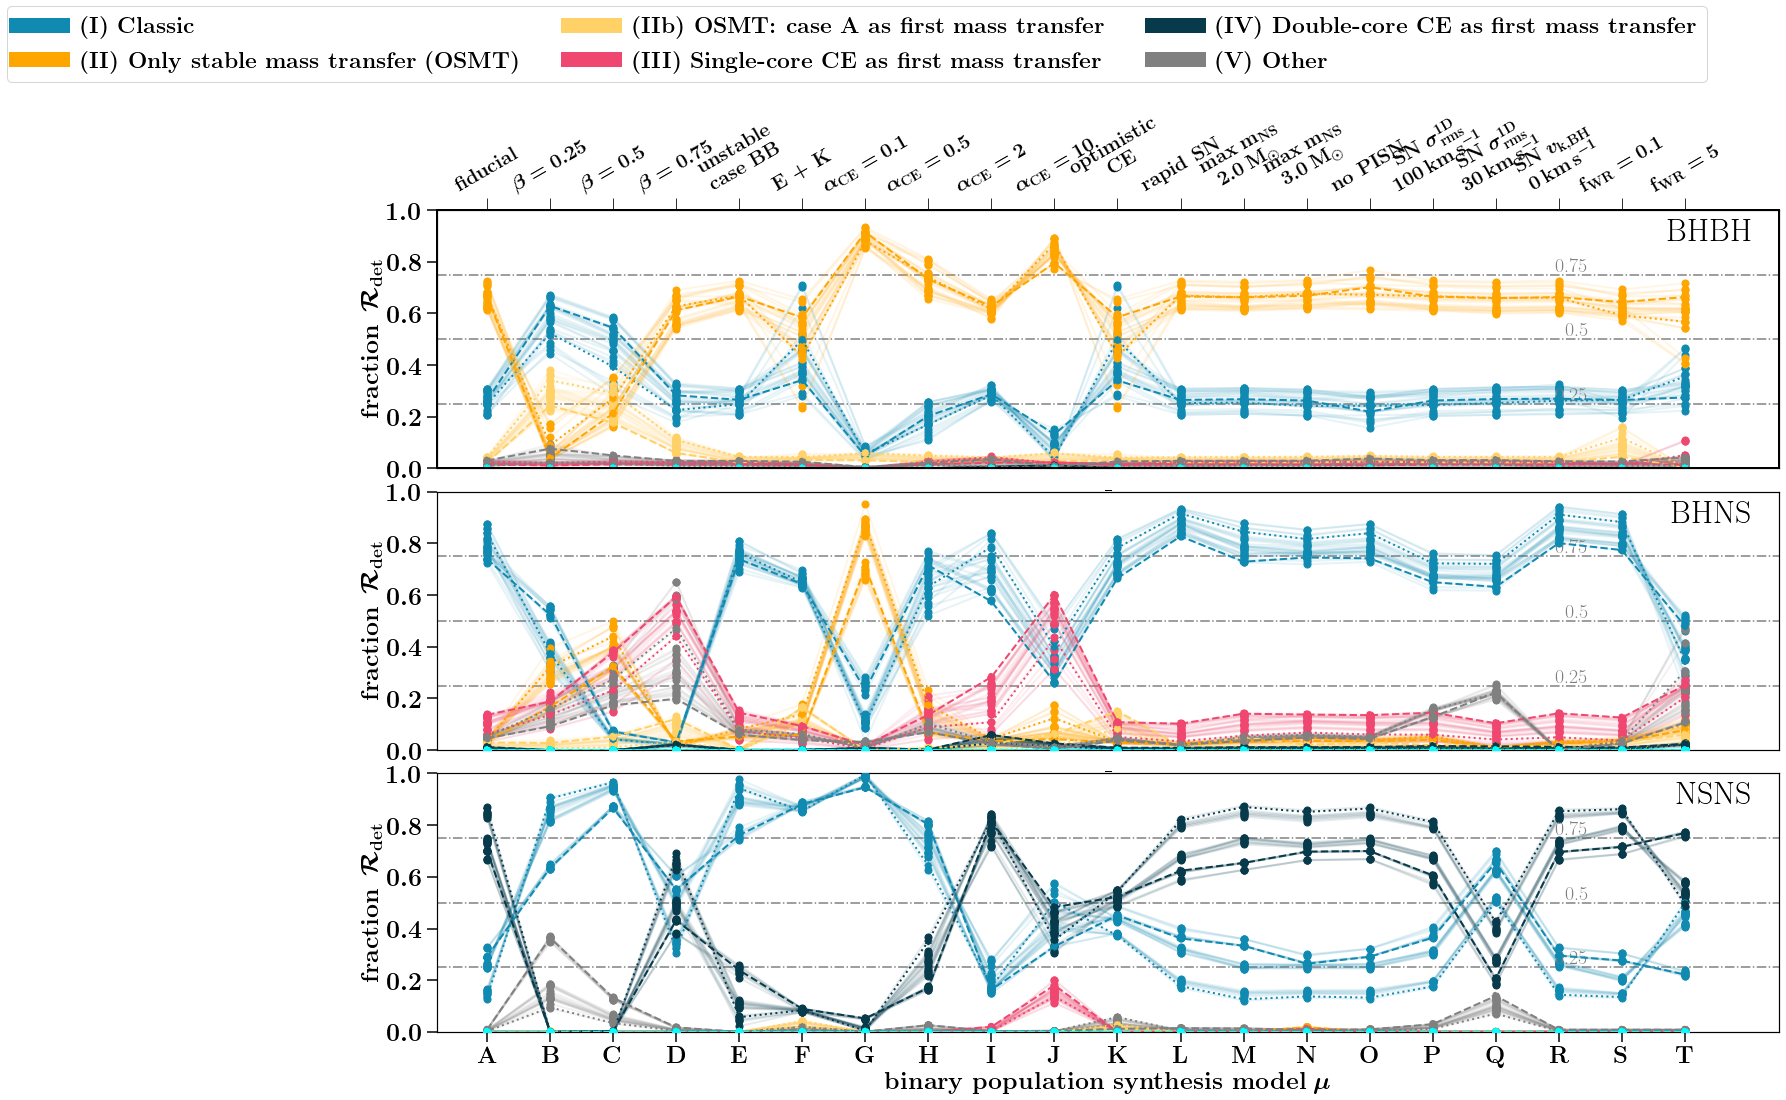

In [6]:
# Floor: note 24-2-2021 these are the OLD rates !!! Replace accordingly with new data 
CSVdir = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1'
ylims =[[0,1],[0,1],[0,1]]
plotFormationChannelRates(whichRate='observed', CSVdir=CSVdir)
